Data Exploration

In [3]:
import pandas as pd

In [ ]:
df=pd.read_excel("D:\DATAS\TBC\TBC.xlsx")  #input data

In [5]:
df.head()  #melihat bentuk data

,Diagnosis Akhir,Ketergantungan,Keluhan Batuk,Keluhan Sesak Nafas,Keluhan Demam,Diagnosa Awal,Riwayat Penyakit Sebelumnya,Jenis Kelamin,Usia
0,0,1,0,0,0,0,0,1,1
1,1,0,1,1,0,1,1,0,1
2,0,2,0,0,0,0,0,1,1
3,1,2,1,1,1,1,2,1,2
4,0,0,0,0,1,0,1,1,1


In [8]:
df.info()          # tipe data, jumlah non-null
df.shape           # ukuran data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Diagnosis Akhir              223 non-null    int64
 1   Ketergantungan               223 non-null    int64
 2   Keluhan Batuk                223 non-null    int64
 3   Keluhan Sesak Nafas          223 non-null    int64
 4   Keluhan Demam                223 non-null    int64
 5   Diagnosa Awal                223 non-null    int64
 6   Riwayat Penyakit Sebelumnya  223 non-null    int64
 7   Jenis Kelamin                223 non-null    int64
 8   Usia                         223 non-null    int64
dtypes: int64(9)
memory usage: 15.8 KB


(223, 9)

In [9]:
df.describe()      # ringkasan statistik numerik

,Diagnosis Akhir,Ketergantungan,Keluhan Batuk,Keluhan Sesak Nafas,Keluhan Demam,Diagnosa Awal,Riwayat Penyakit Sebelumnya,Jenis Kelamin,Usia
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.331839,0.681614,0.479821,0.390135,0.354260,0.739910,0.623318,0.520179,0.973094
std,0.471933,0.823075,0.500717,0.488878,0.479365,0.785324,0.800784,0.500717,0.677298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000


Cleaning Data

In [10]:
df.nunique()       # jumlah unique value per kolom

Diagnosis Akhir                2
Ketergantungan                 3
Keluhan Batuk                  2
Keluhan Sesak Nafas            2
Keluhan Demam                  2
Diagnosa Awal                  3
Riwayat Penyakit Sebelumnya    3
Jenis Kelamin                  2
Usia                           3
dtype: int64

In [11]:
df.isnull().sum()          # missing values


Diagnosis Akhir                0
Ketergantungan                 0
Keluhan Batuk                  0
Keluhan Sesak Nafas            0
Keluhan Demam                  0
Diagnosa Awal                  0
Riwayat Penyakit Sebelumnya    0
Jenis Kelamin                  0
Usia                           0
dtype: int64

In [12]:
(df == "").sum()           # cek string kosong

Diagnosis Akhir                0
Ketergantungan                 0
Keluhan Batuk                  0
Keluhan Sesak Nafas            0
Keluhan Demam                  0
Diagnosa Awal                  0
Riwayat Penyakit Sebelumnya    0
Jenis Kelamin                  0
Usia                           0
dtype: int64

In [13]:
df.duplicated().sum()      # cek duplikasi

56

In [17]:
df.columns

Index(['Diagnosis Akhir', 'Ketergantungan', 'Keluhan Batuk',
       'Keluhan Sesak Nafas', 'Keluhan Demam', 'Diagnosa Awal',
       'Riwayat Penyakit Sebelumnya', 'Jenis Kelamin', 'Usia'],
      dtype='object')

Target Exploration

In [18]:
df['Diagnosis Akhir'].value_counts()  # menghitung jumlah tiap kategori dari target

Diagnosis Akhir
0    149
1     74
Name: count, dtype: int64

<Axes: >

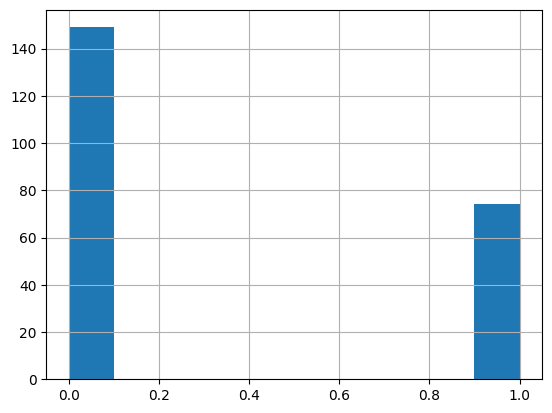

In [19]:
df['Diagnosis Akhir'].hist()  # visualisasi distribusi kategori target

<Axes: >

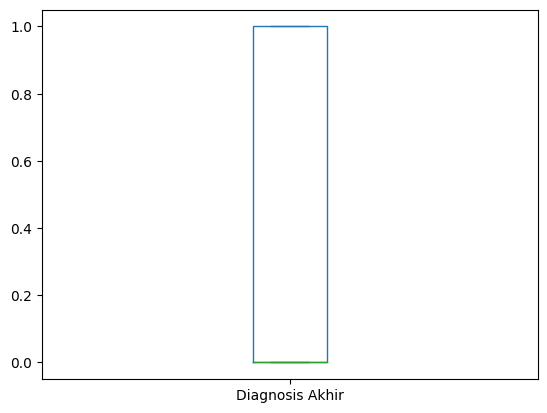

In [20]:
df['Diagnosis Akhir'].plot.box()

Fitur Exploration

In [21]:
df.corr(numeric_only=True)   # korelasi antar numerik

,Diagnosis Akhir,Ketergantungan,Keluhan Batuk,Keluhan Sesak Nafas,Keluhan Demam,Diagnosa Awal,Riwayat Penyakit Sebelumnya,Jenis Kelamin,Usia
Diagnosis Akhir,1.000000,-0.005096,0.562209,0.607780,0.612967,0.404079,0.344164,-0.047527,-0.070589
Ketergantungan,-0.005096,1.000000,0.088174,0.052609,0.001741,-0.003250,-0.046093,0.316231,0.089608
Keluhan Batuk,0.562209,0.088174,1.000000,0.335932,0.358336,0.181333,0.205640,-0.029810,-0.041455
Keluhan Sesak Nafas,0.607780,0.052609,0.335932,1.000000,0.464757,0.265485,0.273517,-0.078310,-0.022572
Keluhan Demam,0.612967,0.001741,0.358336,0.464757,1.000000,0.162098,0.255318,-0.076834,-0.095376
Diagnosa Awal,0.404079,-0.003250,0.181333,0.265485,0.162098,1.000000,0.158674,0.036318,0.012190
Riwayat Penyakit Sebelumnya,0.344164,-0.046093,0.205640,0.273517,0.255318,0.158674,1.000000,-0.093299,-0.051991
Jenis Kelamin,-0.047527,0.316231,-0.029810,-0.078310,-0.076834,0.036318,-0.093299,1.000000,0.014891
Usia,-0.070589,0.089608,-0.041455,-0.022572,-0.095376,0.012190,-0.051991,0.014891,1.000000


In [23]:
pd.crosstab(df['Diagnosis Akhir'], df['Keluhan Batuk'])   # hubungan 2 kategori

Keluhan Batuk,0,1
Diagnosis Akhir,,
0,107,42
1,9,65


In [26]:
target=df['Diagnosis Akhir']
fitur=df.drop(columns=['Diagnosis Akhir'])


In [24]:
df.groupby('Diagnosis Akhir')['Keluhan Batuk'].mean()

Diagnosis Akhir
0    0.281879
1    0.878378
Name: Keluhan Batuk, dtype: float64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

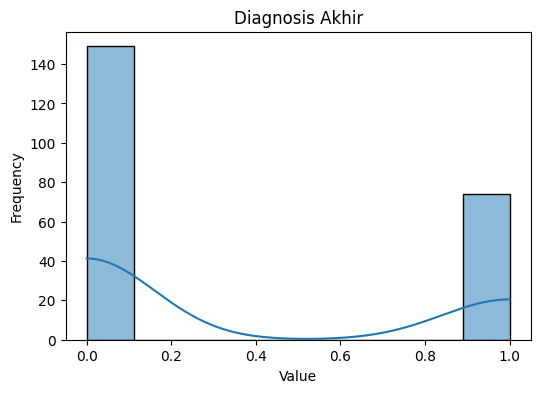

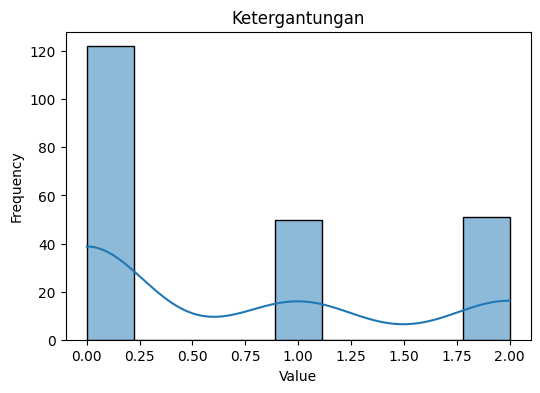

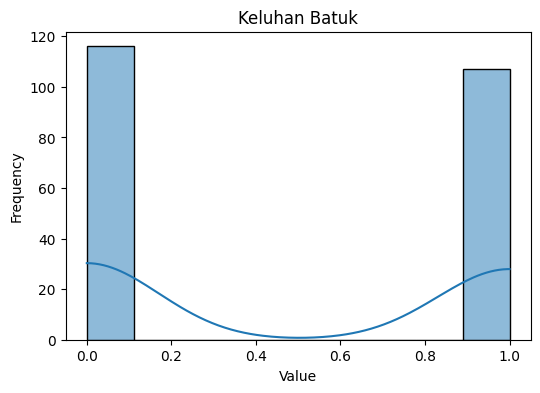

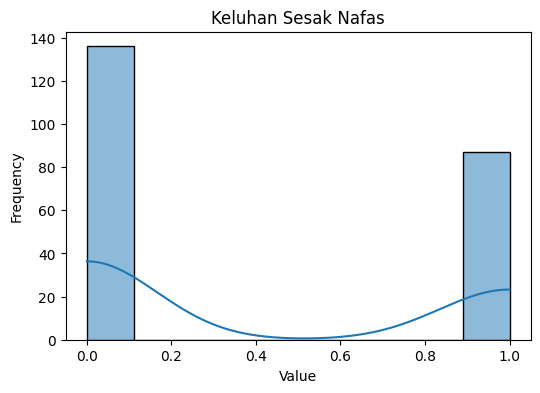

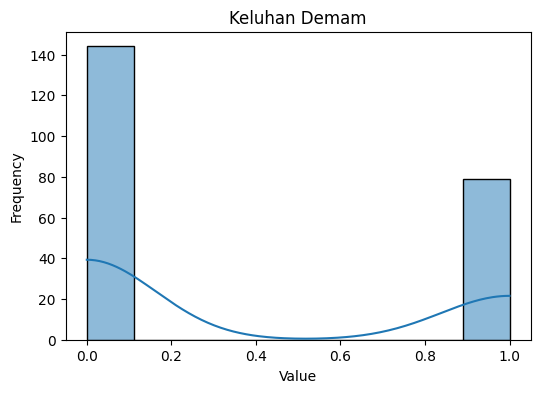

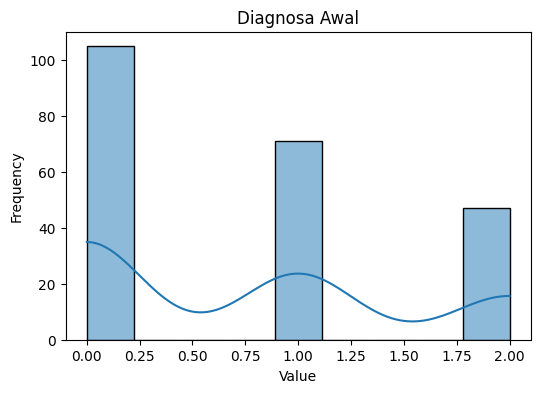

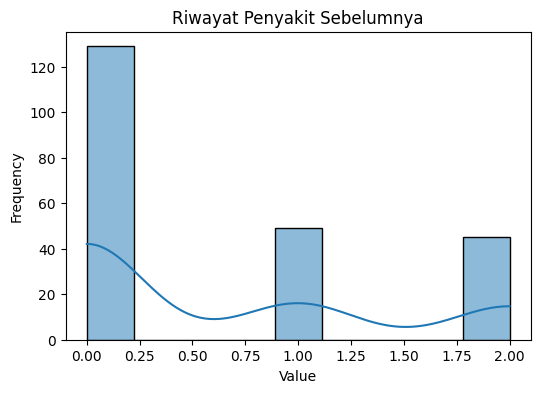

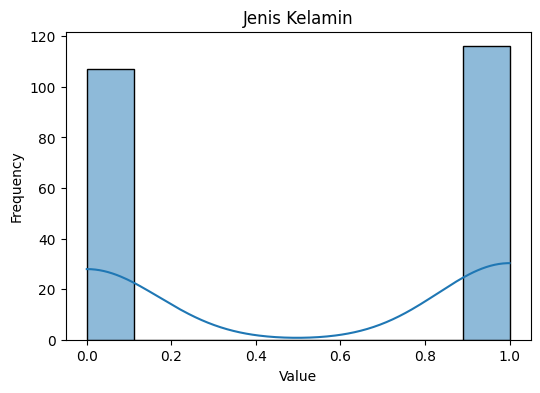

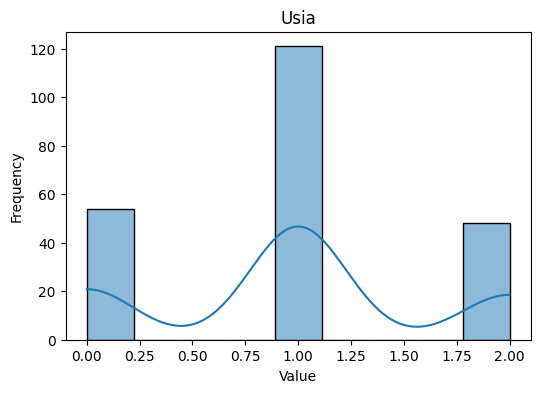

In [37]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

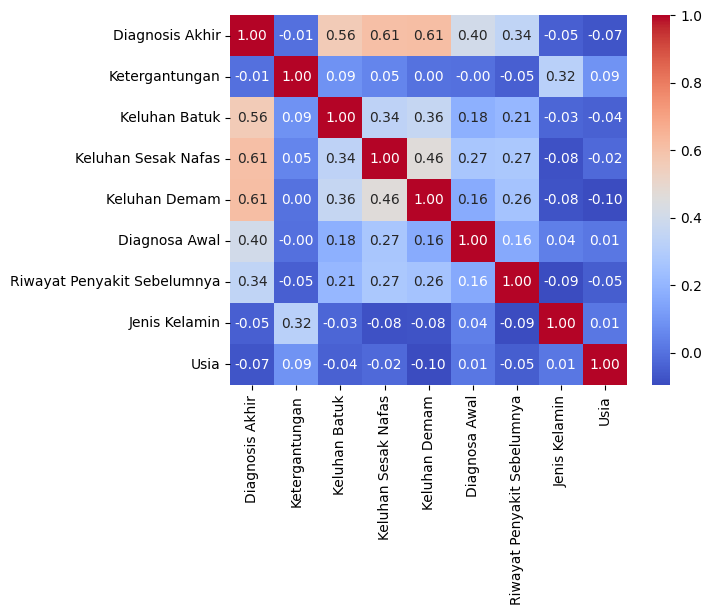

In [39]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
